<a href="https://colab.research.google.com/github/jenpronet/Challenge-Alura-Store/blob/main/AluraStoreLatam_ChallengeOne_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Asegurar que la columna 'Precio' esté en formato numérico
tienda['Precio'] = pd.to_numeric(tienda['Precio'], errors='coerce')
tienda2['Precio'] = pd.to_numeric(tienda2['Precio'], errors='coerce')
tienda3['Precio'] = pd.to_numeric(tienda3['Precio'], errors='coerce')
tienda4['Precio'] = pd.to_numeric(tienda4['Precio'], errors='coerce')

# Calcular ingresos totales por tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Ingreso total Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}")


Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


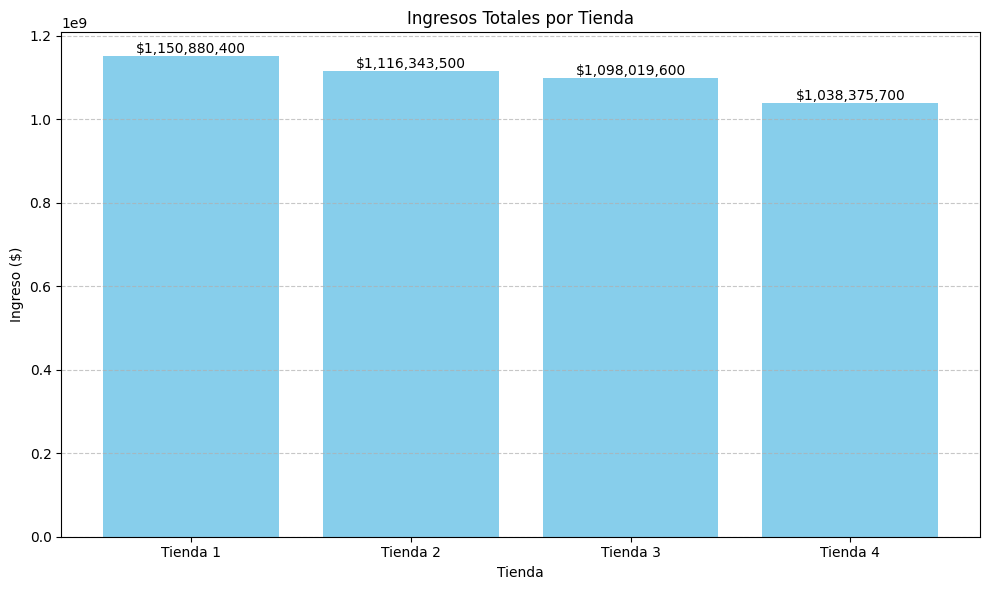

In [ ]:
import matplotlib.pyplot as plt

# Datos para el gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, ingresos, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


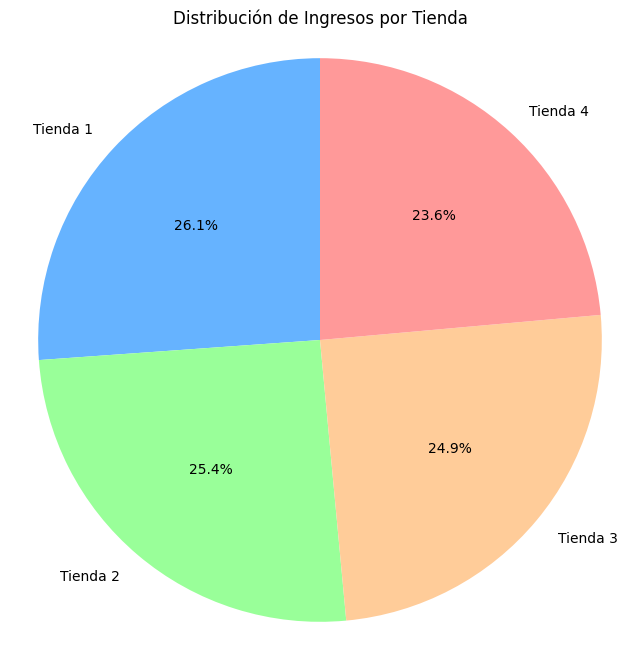

In [ ]:
# Gráfico de pastel para distribución de ingresos
plt.figure(figsize=(8, 8))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title('Distribución de Ingresos por Tienda')
plt.axis('equal')  # Para que el pastel sea un círculo
plt.show()


# 2. Ventas por categoría

In [ ]:
# Verificar las columnas de los DataFrames
print("Columnas Tienda 1:", tienda.columns)
print("Columnas Tienda 2:", tienda2.columns)
print("Columnas Tienda 3:", tienda3.columns)
print("Columnas Tienda 4:", tienda4.columns)


Columnas Tienda 1: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Columnas Tienda 2: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Columnas Tienda 3: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Columnas Tienda 4: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [ ]:
# Contar productos vendidos por categoría en cada tienda
ventas_categoria_t1 = tienda['Categoría del Producto'].value_counts()
ventas_categoria_t2 = tienda2['Categoría del Producto'].value_counts()
ventas_categoria_t3 = tienda3['Categoría del Producto'].value_counts()
ventas_categoria_t4 = tienda4['Categoría del Producto'].value_counts()

# Mostrar los resultados
print("Ventas por Categoría - Tienda 1:\n", ventas_categoria_t1, "\n")
print("Ventas por Categoría - Tienda 2:\n", ventas_categoria_t2, "\n")
print("Ventas por Categoría - Tienda 3:\n", ventas_categoria_t3, "\n")
print("Ventas por Categoría - Tienda 4:\n", ventas_categoria_t4, "\n")


Ventas por Categoría - Tienda 1:
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

Ventas por Categoría - Tienda 2:
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Ventas por Categoría - Tienda 3:
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64 

V

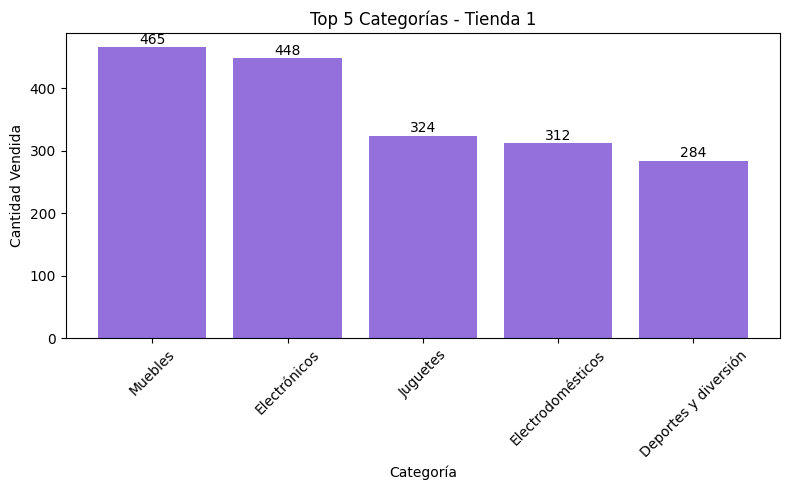

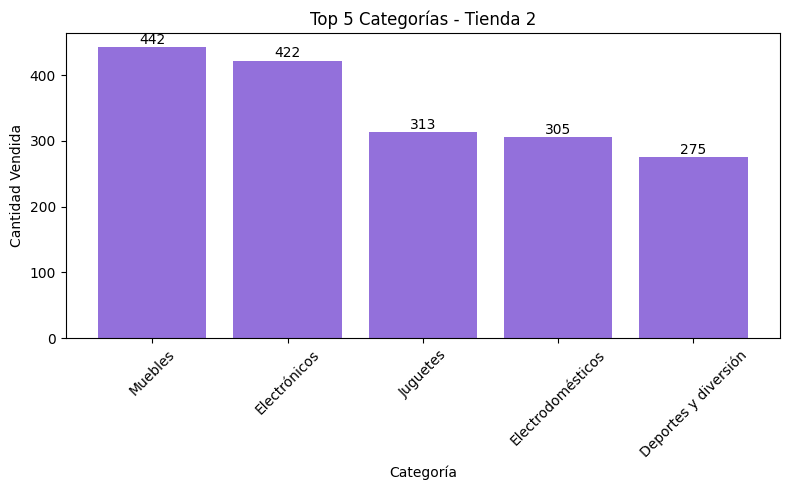

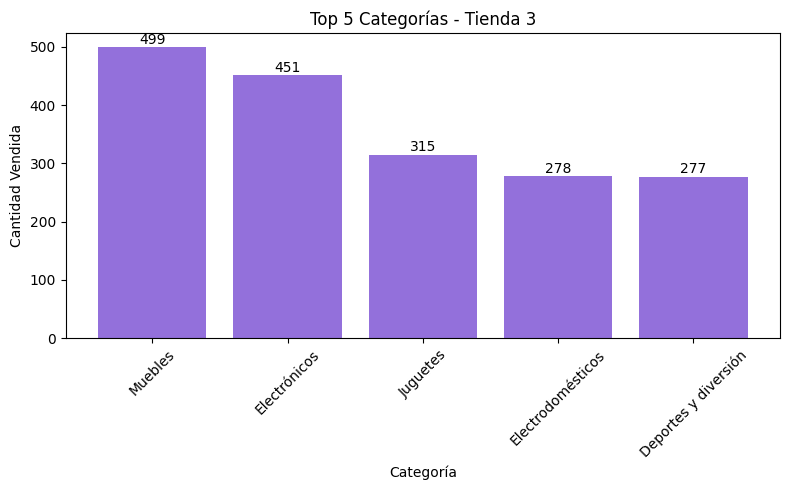

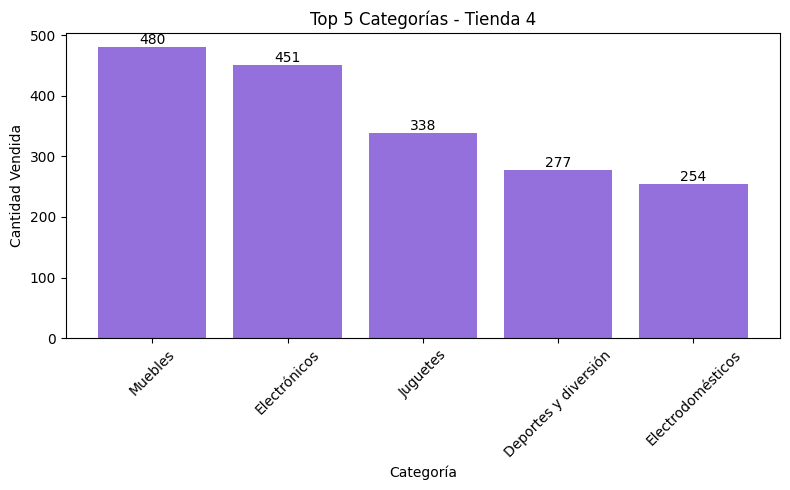

In [ ]:
# Función para graficar el top N de categorías por tienda
def graficar_top_categorias(ventas_categoria, tienda_nombre, top_n=5):
    top_categorias = ventas_categoria.head(top_n)
    plt.figure(figsize=(8,5))
    bars = plt.bar(top_categorias.index, top_categorias.values, color='mediumpurple')
    plt.title(f"Top {top_n} Categorías - {tienda_nombre}")
    plt.xlabel("Categoría")
    plt.ylabel("Cantidad Vendida")
    plt.xticks(rotation=45)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_top_categorias(ventas_categoria_t1, "Tienda 1")
graficar_top_categorias(ventas_categoria_t2, "Tienda 2")
graficar_top_categorias(ventas_categoria_t3, "Tienda 3")
graficar_top_categorias(ventas_categoria_t4, "Tienda 4")


# 3. Calificación promedio de la tienda


In [ ]:
# Asegurarnos de que la columna 'Calificación' esté en formato numérico
tienda['Calificación'] = pd.to_numeric(tienda['Calificación'], errors='coerce')
tienda2['Calificación'] = pd.to_numeric(tienda2['Calificación'], errors='coerce')
tienda3['Calificación'] = pd.to_numeric(tienda3['Calificación'], errors='coerce')
tienda4['Calificación'] = pd.to_numeric(tienda4['Calificación'], errors='coerce')

# Calcular calificación promedio por tienda
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

# Mostrar los resultados
print(f"Calificación promedio Tienda 1: {calificacion_promedio_tienda1:.2f}")
print(f"Calificación promedio Tienda 2: {calificacion_promedio_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {calificacion_promedio_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {calificacion_promedio_tienda4:.2f}")


Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


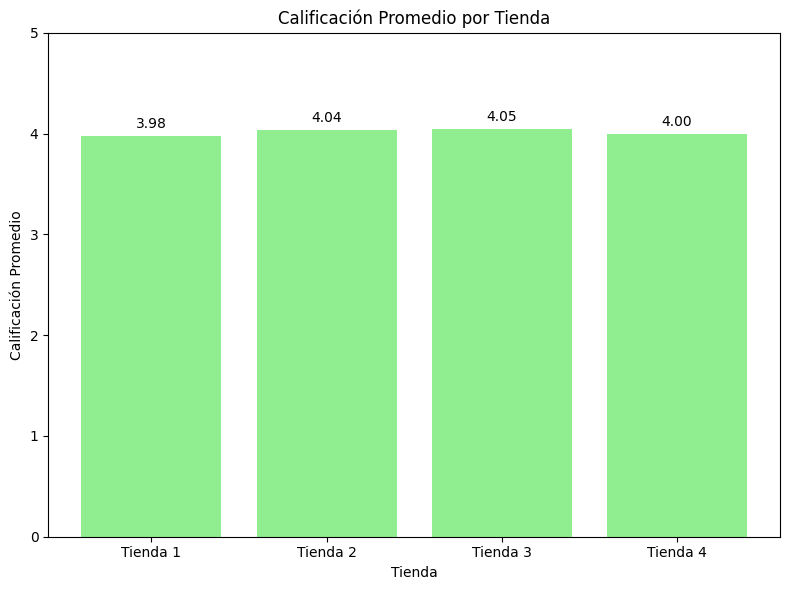

In [ ]:
# Graficar las calificaciones promedio por tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [
    calificacion_promedio_tienda1,
    calificacion_promedio_tienda2,
    calificacion_promedio_tienda3,
    calificacion_promedio_tienda4
]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(tiendas, calificaciones_promedio, color='lightgreen')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)  # Para que la escala de las calificaciones esté entre 0 y 5
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Contar la cantidad de veces que cada producto aparece (ventas por producto)
ventas_producto_t1 = tienda['Producto'].value_counts()
ventas_producto_t2 = tienda2['Producto'].value_counts()
ventas_producto_t3 = tienda3['Producto'].value_counts()
ventas_producto_t4 = tienda4['Producto'].value_counts()

# Mostrar los resultados
print("Productos más vendidos - Tienda 1:\n", ventas_producto_t1.head(), "\n")
print("Productos menos vendidos - Tienda 1:\n", ventas_producto_t1.tail(), "\n")
print("Productos más vendidos - Tienda 2:\n", ventas_producto_t2.head(), "\n")
print("Productos menos vendidos - Tienda 2:\n", ventas_producto_t2.tail(), "\n")
print("Productos más vendidos - Tienda 3:\n", ventas_producto_t3.head(), "\n")
print("Productos menos vendidos - Tienda 3:\n", ventas_producto_t3.tail(), "\n")
print("Productos más vendidos - Tienda 4:\n", ventas_producto_t4.head(), "\n")
print("Productos menos vendidos - Tienda 4:\n", ventas_producto_t4.tail(), "\n")


Productos más vendidos - Tienda 1:
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64 

Productos menos vendidos - Tienda 1:
 Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64 

Productos más vendidos - Tienda 2:
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64 

Productos menos vendidos - Tienda 2:
 Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64 

Productos más vendidos - Tienda 3:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche   

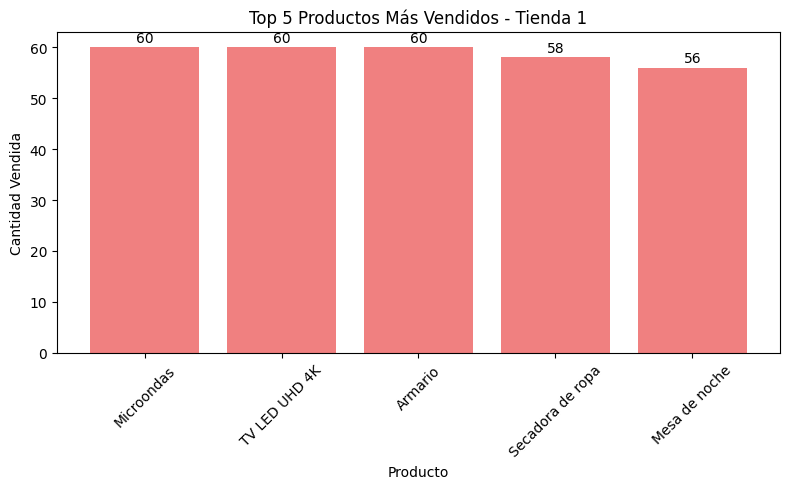

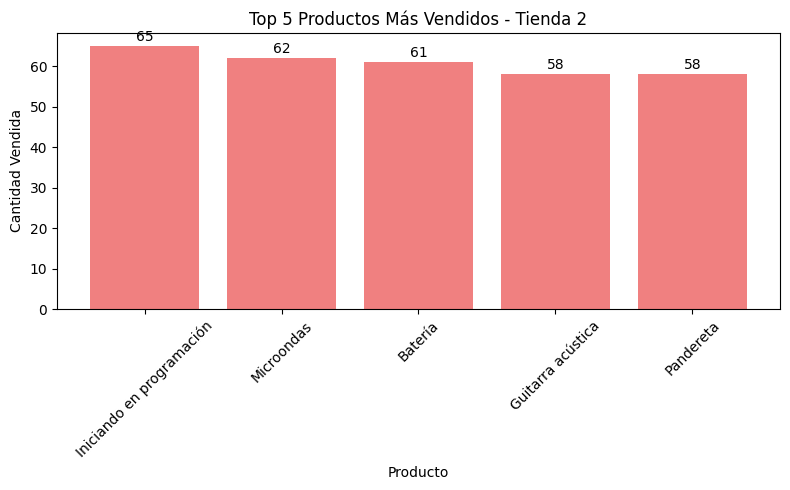

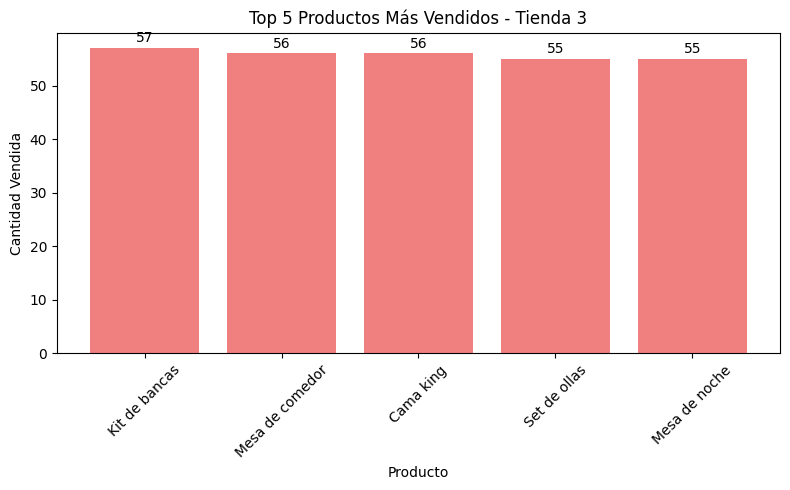

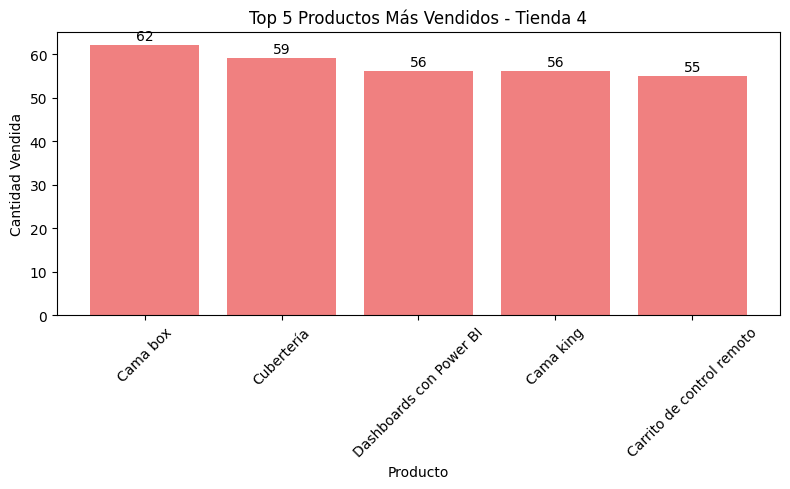

In [ ]:
# Función para graficar los productos más vendidos
def graficar_top_productos(ventas_producto, tienda_nombre, top_n=5):
    top_productos = ventas_producto.head(top_n)
    plt.figure(figsize=(8,5))
    bars = plt.bar(top_productos.index, top_productos.values, color='lightcoral')
    plt.title(f"Top {top_n} Productos Más Vendidos - {tienda_nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad Vendida")
    plt.xticks(rotation=45)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_top_productos(ventas_producto_t1, "Tienda 1")
graficar_top_productos(ventas_producto_t2, "Tienda 2")
graficar_top_productos(ventas_producto_t3, "Tienda 3")
graficar_top_productos(ventas_producto_t4, "Tienda 4")


# 5. Envío promedio por tienda

In [ ]:
# Asegurarnos de que la columna 'Costo de envío' esté en formato numérico
tienda['Costo de envío'] = pd.to_numeric(tienda['Costo de envío'], errors='coerce')
tienda2['Costo de envío'] = pd.to_numeric(tienda2['Costo de envío'], errors='coerce')
tienda3['Costo de envío'] = pd.to_numeric(tienda3['Costo de envío'], errors='coerce')
tienda4['Costo de envío'] = pd.to_numeric(tienda4['Costo de envío'], errors='coerce')

# Calcular costo de envío promedio por tienda
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Mostrar los resultados
print(f"Costo de envío promedio Tienda 1: ${costo_envio_promedio_tienda1:.2f}")
print(f"Costo de envío promedio Tienda 2: ${costo_envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio Tienda 3: ${costo_envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio Tienda 4: ${costo_envio_promedio_tienda4:.2f}")


Costo de envío promedio Tienda 1: $26018.61
Costo de envío promedio Tienda 2: $25216.24
Costo de envío promedio Tienda 3: $24805.68
Costo de envío promedio Tienda 4: $23459.46


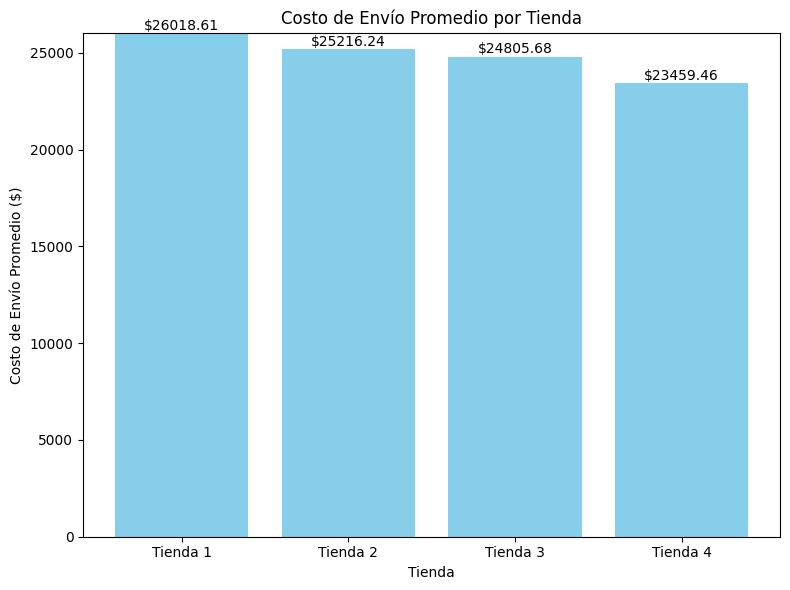

In [ ]:
# Graficar el costo de envío promedio por tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio_promedio = [
    costo_envio_promedio_tienda1,
    costo_envio_promedio_tienda2,
    costo_envio_promedio_tienda3,
    costo_envio_promedio_tienda4
]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(tiendas, costos_envio_promedio, color='skyblue')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio ($)')
plt.ylim(0, max(costos_envio_promedio) + 10)  # Ajustar el límite superior para una mejor visualización
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'${height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Analisis del Desempeño Geografico

Ventas por Ubicacion - Grafico de Dispersion

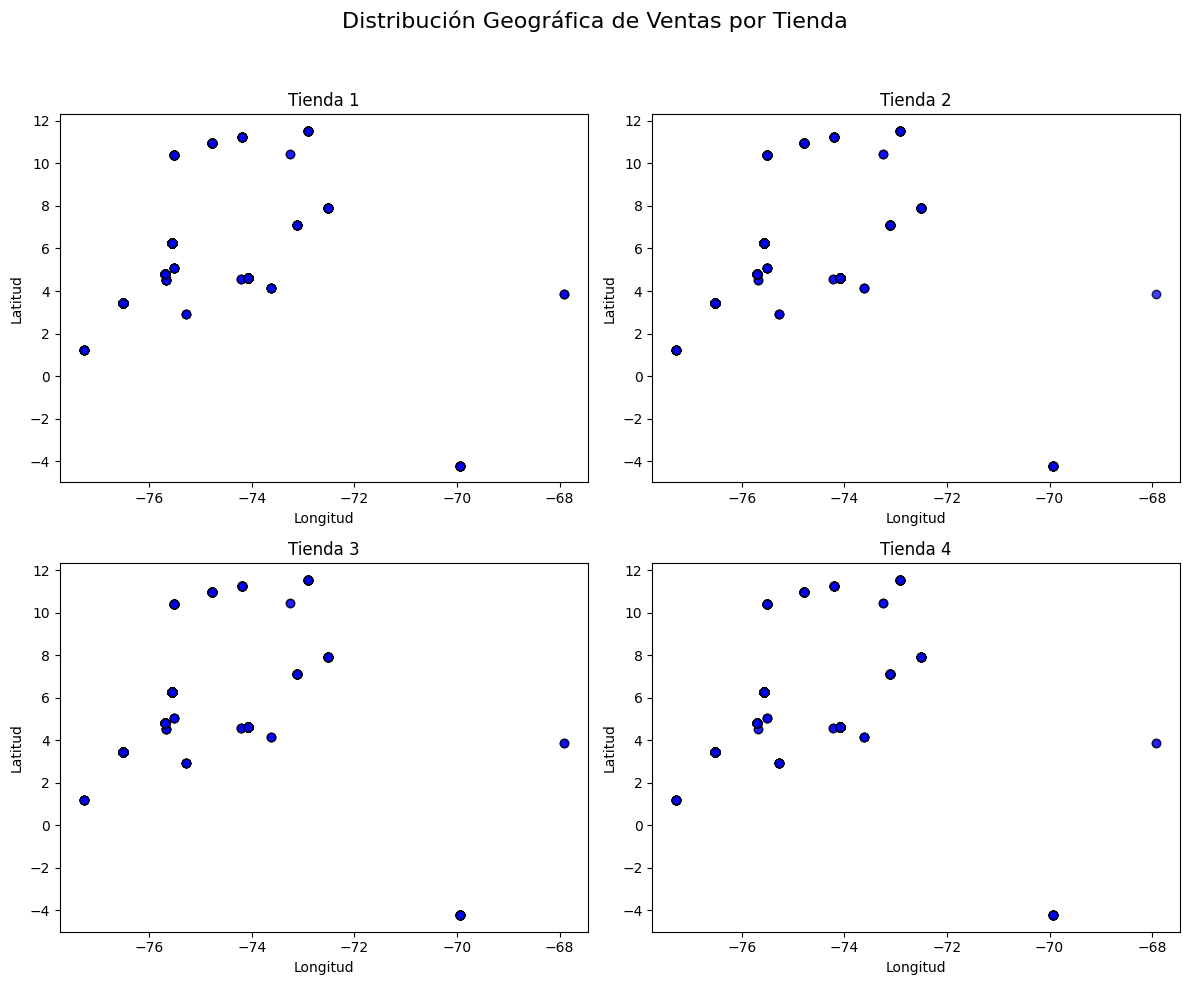

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con subplots para las 4 tiendas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribución Geográfica de Ventas por Tienda', fontsize=16)

# Lista de tiendas
tiendas = [(tienda, 'Tienda 1'), (tienda2, 'Tienda 2'), (tienda3, 'Tienda 3'), (tienda4, 'Tienda 4')]
ax_list = axs.flatten()

# Graficar cada tienda
for i, (df, titulo) in enumerate(tiendas):
    ax = ax_list[i]
    ax.scatter(df['lon'], df['lat'], alpha=0.5, c='blue', edgecolor='k')
    ax.set_title(titulo)
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Mapa de Calor de Densidad - Heatmap con Seaborn

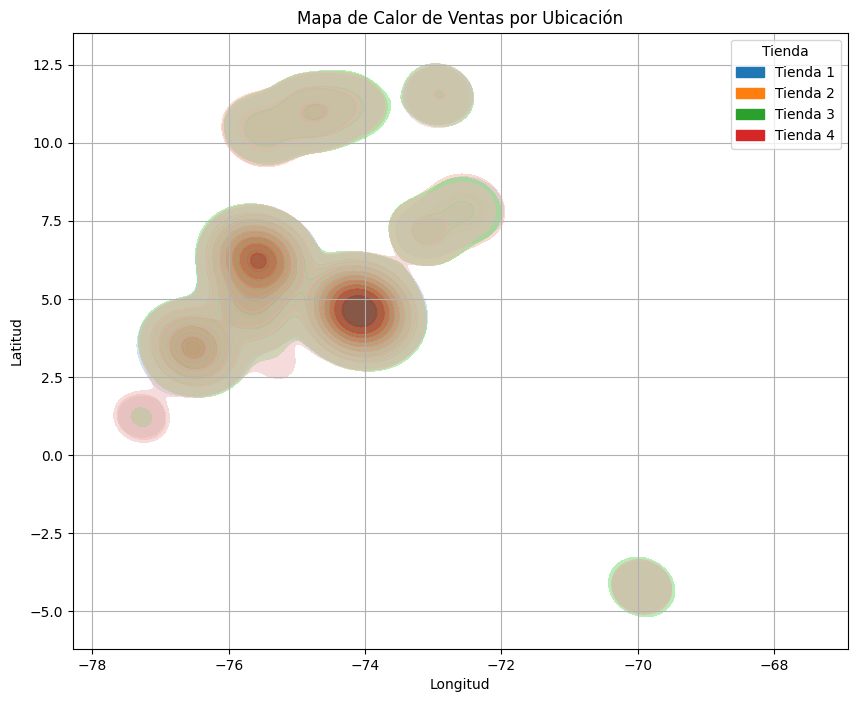

In [ ]:
import seaborn as sns

# Unir todos los datos en un solo DataFrame y agregar etiquetas
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
df_all = pd.concat([tienda, tienda2, tienda3, tienda4])

plt.figure(figsize=(10, 8))
sns.kdeplot(data=df_all, x='lon', y='lat', hue='Tienda', fill=True, alpha=0.5)
plt.title('Mapa de Calor de Ventas por Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


Ingresos por Región

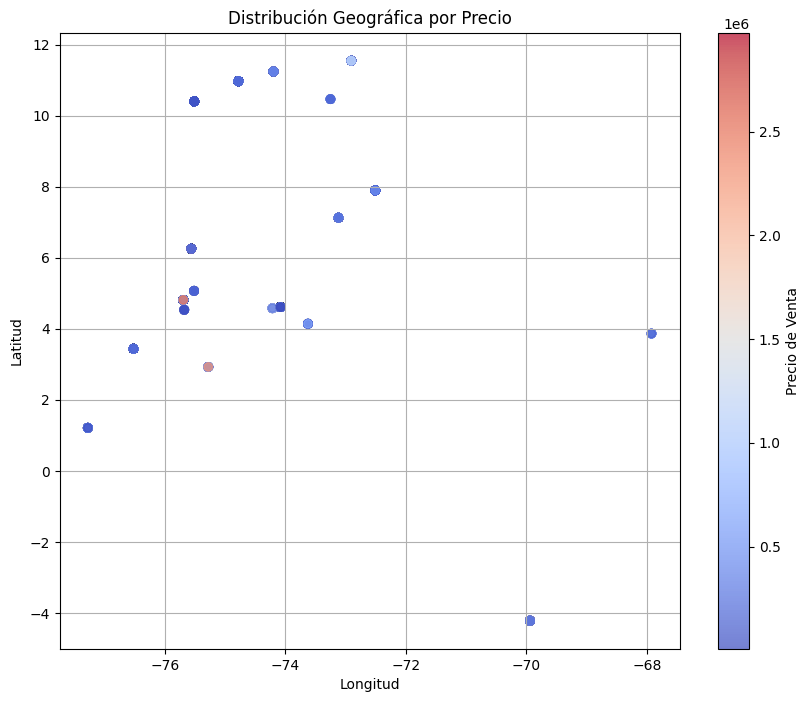

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_all['lon'], df_all['lat'], c=df_all['Precio'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Precio de Venta')
plt.title('Distribución Geográfica por Precio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


# 📊 Informe Final de Análisis de Tiendas - Alura Store

## 1. 🧭 Introducción

El presente informe tiene como objetivo determinar **cuál de las cuatro tiendas del Sr. Juan debe ser vendida**, con base en un análisis exhaustivo de desempeño. Se consideraron múltiples variables clave para la toma de decisión:

- Ingresos totales por tienda  
- Categorías de productos más y menos vendidos  
- Calificaciones promedio de los clientes  
- Productos más y menos vendidos  
- Costo de envío promedio

Este análisis identifica fortalezas y debilidades de cada tienda, brindando una recomendación clara y objetiva.

---

## 2. 📌 Desarrollo

### 2.1. 💰 Ingresos Totales por Tienda

- **Tienda 1**: $1,150,880,400.00

- **Tienda 2**: $1,116,343,500.00  

- **Tienda 3**: $1,098,019,600.00  

- **Tienda 4**: $1,038,375,700.00  



**➡️ Conclusión**: La Tienda 1 es la más rentable. La Tienda 4 muestra el menor ingreso.

---

### 2.2. 📦 Ventas por Categoría

Todas las tiendas comparten un patrón similar:

- **Categorías más vendidas**: Muebles y Electrónicos
- **Categorías menos vendidas**: Artículos para el hogar, Libros e Instrumentos musicales

**➡️ Conclusión**: Aunque similares, la Tienda 3 lidera en cantidad total de ventas por categoría.

---

### 2.3. 🌟 Calificación Promedio por Tienda

| Tienda  | Calificación Promedio |
|---------|------------------------|
| Tienda 1 | 3.98 ❌              |
| Tienda 2 | 4.04                 |
| Tienda 3 | 4.05 ✅              |
| Tienda 4 | 4.00                 |

**➡️ Conclusión**: Tienda 3 tiene la mejor satisfacción del cliente.

---

### 2.4. 🏆 Productos Más y Menos Vendidos

#### Más vendidos:
- **Tienda 1**: Microondas, TV LED UHD 4K, Armario
- **Tienda 2**: Iniciando en programación, Batería, Microondas
- **Tienda 3**: Kit de bancas, Mesa de comedor, Cama king
- **Tienda 4**: Cama box, Cubertería, Power BI Dashboards

#### Menos vendidos:
- Repetición de productos con baja demanda como: Guitarra eléctrica, Pandereta, Ciencia de datos con Python, Celular ABXY

**➡️ Conclusión**: Tienda 1 y 2 presentan más consistencia en sus productos top. Las demás presentan más dispersión.

---

### 2.5. 🚚 Costo de Envío Promedio

- **Tienda 1**: $26,018.61 ❌

- **Tienda 2**: $25,216.24

- **Tienda 3**: $24,805.68

- **Tienda 4**: $23,459.46 ✅

**➡️ Conclusión**: Tienda 4 es la más eficiente en logística. Tienda 1 la más costosa.

---

## 3. ✅ Conclusión y Recomendación

Luego de evaluar los factores clave, se concluye que:

> ### 💡 **El Sr. Juan debería vender la Tienda 4**

### 🎯 Justificación:
- **Menor ingreso**: $1,038,375,700.00
- **Calificación promedio baja**: 4.00
- **Ventas por categoría similares**, pero no destaca
- **Costo logístico bajo**, pero no compensa los puntos anteriores

### 🏪 Tiendas a conservar:
- **Tienda 1**: Mayor ingreso total y ventas consistentes
- **Tienda 2**: Buen balance entre ingreso, satisfacción y logística
- **Tienda 3**: Mejor calificación y costos de envío competitivos

---

